In [1]:
#Added the keys for age and sex

In [1]:
# Import packages, initial settings

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import anndata
import scrublet as scr
import seaborn as sns
import magic
import pybiomart
import six
import sys
sys.modules['sklearn.externals.six'] = six
import scanorama
import harmonypy
import bbknn
import gseapy
from gseapy.plot import barplot, dotplot
import scvelo as scv
import scvi

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300, facecolor='white')
sc.logging.print_version_and_date()
#sc.logging.print_versions()

Global seed set to 0


Running Scanpy 1.8.1, on 2023-06-23 12:09.


In [2]:
adata=sc.read('./Objects/Feb28ObjectProcessed.h5ad')
print(adata.shape)

(297473, 3392)


In [5]:
adata=sc.read('./Objects/Feb28ObjectRaw.h5ad')
print(adata.shape)

(297473, 36601)


In [10]:
#Combine all barcodes
CoronaryPericytes=[x.strip() for x in open('./Index/Mesenchymal/CoronaryPericytes.txt')]
CoronarySmoothMuscleCells=[x.strip() for x in open('./Index/Mesenchymal/CoronarySmoothMuscleCells.txt')]
CoronaryVesselAdventitialFibroblasts=[x.strip() for x in open('./Index/Mesenchymal/CoronaryVesselAdventitialFibroblasts.txt')]
DuctusArteriosusSmoothMuscleCells=[x.strip() for x in open('./Index/Mesenchymal/DuctusArteriosusSmoothMuscleCells.txt')]
GreatVesselAdventitialFibroblasts=[x.strip() for x in open('./Index/Mesenchymal/GreatVesselAdventitialFibroblasts.txt')]
GreatVesselSmoothMuscleCells=[x.strip() for x in open('./Index/Mesenchymal/GreatVesselSmoothMuscleCells.txt')]
LymphNodeFibroblasticReticularCells=[x.strip() for x in open('./Index/Mesenchymal/LymphNodeFibroblasticReticularCells.txt')]
MyocardialInterstitialFibroblasts1=[x.strip() for x in open('./Index/Mesenchymal/MyocardialInterstitialFibroblasts1.txt')]
MyocardialInterstitialFibroblasts2=[x.strip() for x in open('./Index/Mesenchymal/MyocardialInterstitialFibroblasts2.txt')]
Myofibroblasts=[x.strip() for x in open('./Index/Mesenchymal/Myofibroblasts.txt')]
PericardialCells1=[x.strip() for x in open('./Index/Mesenchymal/PericardialCells1.txt')]
PericardialCells2=[x.strip() for x in open('./Index/Mesenchymal/PericardialCells2.txt')]
PericardialCells3=[x.strip() for x in open('./Index/Mesenchymal/PericardialCells3.txt')]
ValveInterstitialCells=[x.strip() for x in open('./Index/Mesenchymal/ValveInterstitialCells.txt')]
MesenchymalIndex=CoronaryPericytes+CoronarySmoothMuscleCells+CoronaryVesselAdventitialFibroblasts+DuctusArteriosusSmoothMuscleCells+GreatVesselAdventitialFibroblasts+LymphNodeFibroblasticReticularCells+GreatVesselSmoothMuscleCells+MyocardialInterstitialFibroblasts1+MyocardialInterstitialFibroblasts2+Myofibroblasts+PericardialCells1+PericardialCells2+PericardialCells3+ValveInterstitialCells

AtrialCardiomyocytesCycling=[x.strip() for x in open('./Index/Cardiomyocytes/AtrialCardiomyocytesCycling.txt')]
AtrialCardiomyocytesLeft=[x.strip() for x in open('./Index/Cardiomyocytes/AtrialCardiomyocytesLeft.txt')]
AtrialCardiomyocytesRight=[x.strip() for x in open('./Index/Cardiomyocytes/AtrialCardiomyocytesRight.txt')]
AtrioventricularNodeCardiomyocytes=[x.strip() for x in open('./Index/Cardiomyocytes/AtrioventricularNodeCardiomyocytes.txt')]
SinoatrialNodeCardiomyocytes=[x.strip() for x in open('./Index/Cardiomyocytes/SinoatrialNodeCardiomyocytes.txt')]
VentricularCardiomyocytesCycling=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularCardiomyocytesCycling.txt')]
VentricularCardiomyocytesLeftCompact=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularCardiomyocytesLeftCompact.txt')]
VentricularCardiomyocytesLeftTrabeculated=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularCardiomyocytesLeftTrabeculated.txt')]
VentricularCardiomyocytesRightCompact=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularCardiomyocytesRightCompact.txt')]
VentricularCardiomyocytesRightTrabeculated=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularCardiomyocytesRightTrabeculated.txt')]
VentricularConductionSystemDistal=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularConductionSystemDistal.txt')]
VentricularConductionSystemProximal=[x.strip() for x in open('./Index/Cardiomyocytes/VentricularConductionSystemProximal.txt')]
CardiomyocyteIndex=AtrialCardiomyocytesCycling+AtrialCardiomyocytesLeft+AtrialCardiomyocytesRight+AtrioventricularNodeCardiomyocytes+SinoatrialNodeCardiomyocytes+VentricularCardiomyocytesLeftCompact+VentricularCardiomyocytesCycling+VentricularCardiomyocytesRightTrabeculated+VentricularCardiomyocytesRightCompact+VentricularCardiomyocytesLeftTrabeculated+VentricularConductionSystemDistal+VentricularConductionSystemProximal

CoronaryArterialEndothelialCells=[x.strip() for x in open('./Index/Endothelium/CoronaryArterialEndothelialCells.txt')]
CoronaryCapillaryEndothelialCells=[x.strip() for x in open('./Index/Endothelium/CoronaryCapillaryEndothelialCells.txt')]
CoronaryVenousEndothelialCells=[x.strip() for x in open('./Index/Endothelium/CoronaryVenousEndothelialCells.txt')]
EndocardialCells=[x.strip() for x in open('./Index/Endothelium/EndocardialCells.txt')]
EndocardialCushionCells=[x.strip() for x in open('./Index/Endothelium/EndocardialCushionCells.txt')]
GreatVesselArterialEndothelialCells=[x.strip() for x in open('./Index/Endothelium/GreatVesselArterialEndothelialCells.txt')]
GreatVesselVenousEndothelialCells=[x.strip() for x in open('./Index/Endothelium/GreatVesselVenousEndothelialCells.txt')]
LymphaticEndothelialCells=[x.strip() for x in open('./Index/Endothelium/LymphaticEndothelialCells.txt')]
ValveEndothelialCells=[x.strip() for x in open('./Index/Endothelium/ValveEndothelialCells.txt')]
EndotheliumIndex=CoronaryArterialEndothelialCells+CoronaryCapillaryEndothelialCells+CoronaryVenousEndothelialCells+EndocardialCells+EndocardialCushionCells+GreatVesselArterialEndothelialCells+GreatVesselVenousEndothelialCells+LymphaticEndothelialCells+ValveEndothelialCells

EpicardiumDerivedCells=[x.strip() for x in open('./Index/Epicardium/EpicardiumDerivedCells.txt')]
MesothelialEpicardialCells=[x.strip() for x in open('./Index/Epicardium/MesothelialEpicardialCells.txt')]
EpicardiumIndex=EpicardiumDerivedCells+MesothelialEpicardialCells

SchwannCells=[x.strip() for x in open('./Index/Neural/SchwannCells.txt')]
SchwannCellPrecursors=[x.strip() for x in open('./Index/Neural/SchwannCellPrecursors.txt')]
ChromaffinCells=[x.strip() for x in open('./Index/Neural/ChromaffinCells.txt')]
NeuronPrecursors=[x.strip() for x in open('./Index/Neural/NeuronPrecursors.txt')]
ParasympatheticNeurons=[x.strip() for x in open('./Index/Neural/ParaympatheticNeurons.txt')]
SympatheticNeurons=[x.strip() for x in open('./Index/Neural/SympatheticNeurons.txt')]
NeuralIndex=ChromaffinCells+NeuronPrecursors+ParasympatheticNeurons+SchwannCellPrecursors+SchwannCells+SympatheticNeurons

BCells=[x.strip() for x in open('./Index/Immune/BCells.txt')]
BCellsMS4A1pos=[x.strip() for x in open('./Index/Immune/BCellsMS4A1pos.txt')]
TCellsCD4pos=[x.strip() for x in open('./Index/Immune/TCellsCD4pos.txt')]
TregsCD4pos=[x.strip() for x in open('./Index/Immune/TregsCD4pos.txt')]
TCellsCD8pos=[x.strip() for x in open('./Index/Immune/TCellsCD8pos.txt')]
DendriticCellsType1=[x.strip() for x in open('./Index/Immune/DendriticCellsType1.txt')]
DendriticCellsMature=[x.strip() for x in open('./Index/Immune/DendriticCellsMature.txt')]
InnateLymphoidCells=[x.strip() for x in open('./Index/Immune/InnateLymphoidCells.txt')]
MacrophagesATF3pos=[x.strip() for x in open('./Index/Immune/MacrophagesATF3pos.txt')]
MacrophagesCX3CR1pos=[x.strip() for x in open('./Index/Immune/MacrophagesCX3CR1pos.txt')]
MacrophagesLYVE1pos=[x.strip() for x in open('./Index/Immune/MacrophagesLYVE1pos.txt')]
MacrophagesTIMD4pos=[x.strip() for x in open('./Index/Immune/MacrophagesTIMD4pos.txt')]
MastCells=[x.strip() for x in open('./Index/Immune/MastCells.txt')]
Megakaryocytes=[x.strip() for x in open('./Index/Immune/Megakaryocytes.txt')]
MonocyteDerivedCells=[x.strip() for x in open('./Index/Immune/MonocyteDerivedCells.txt')]
Monocytes=[x.strip() for x in open('./Index/Immune/Monocytes.txt')]
MonocytesMPOpos=[x.strip() for x in open('./Index/Immune/MonocytesMPOpos.txt')]
NaturalKillerCells=[x.strip() for x in open('./Index/Immune/NaturalKillerCells.txt')]
PlasmacytoidDendriticCells=[x.strip() for x in open('./Index/Immune/PlasmacytoidDendriticCells.txt')]
ProBCells=[x.strip() for x in open('./Index/Immune/ProBCells.txt')]

ImmuneIndex=BCells+BCellsMS4A1pos+TCellsCD4pos+TregsCD4pos+TCellsCD8pos+DendriticCellsType1+DendriticCellsMature+InnateLymphoidCells+MacrophagesATF3pos+MacrophagesCX3CR1pos+MacrophagesLYVE1pos+MacrophagesTIMD4pos+MastCells+Megakaryocytes+MonocyteDerivedCells+Monocytes+MonocytesMPOpos+NaturalKillerCells+PlasmacytoidDendriticCells+ProBCells

AllIndex=MesenchymalIndex+CardiomyocyteIndex+EndotheliumIndex+ImmuneIndex+EpicardiumIndex+NeuralIndex
print(len(AllIndex))

299493


... storing 'fine_grain' as categorical


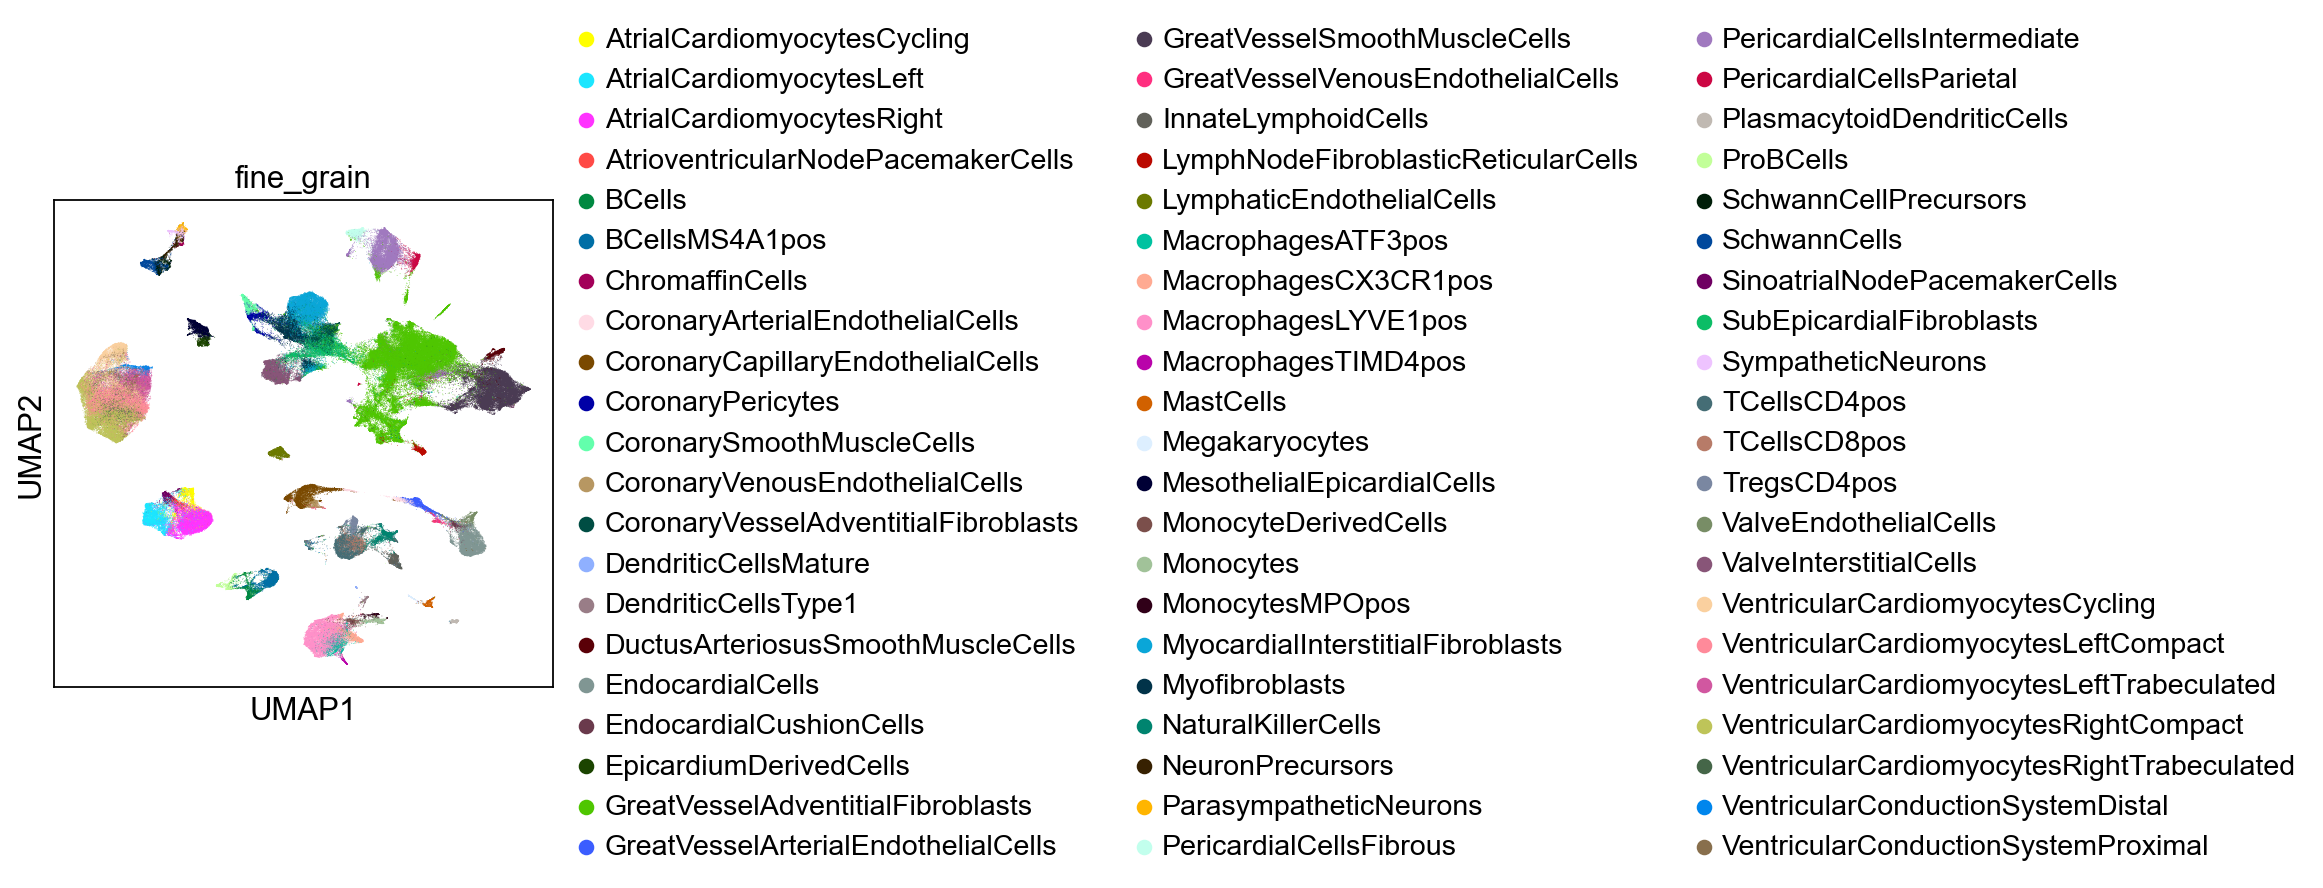

In [11]:
adata.obs['fine_grain']= 'na'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronaryPericytes]]='CoronaryPericytes'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronarySmoothMuscleCells]]='CoronarySmoothMuscleCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronaryVesselAdventitialFibroblasts]]='CoronaryVesselAdventitialFibroblasts'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in DuctusArteriosusSmoothMuscleCells]]='DuctusArteriosusSmoothMuscleCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in GreatVesselAdventitialFibroblasts]]='GreatVesselAdventitialFibroblasts'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in LymphNodeFibroblasticReticularCells]]='LymphNodeFibroblasticReticularCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in GreatVesselSmoothMuscleCells]]='GreatVesselSmoothMuscleCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MyocardialInterstitialFibroblasts1]]='MyocardialInterstitialFibroblasts'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MyocardialInterstitialFibroblasts2]]='SubEpicardialFibroblasts'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in Myofibroblasts]]='Myofibroblasts'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in PericardialCells1]]='PericardialCellsIntermediate'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in PericardialCells2]]='PericardialCellsFibrous'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in PericardialCells3]]='PericardialCellsParietal'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in ValveInterstitialCells]]='ValveInterstitialCells'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in AtrialCardiomyocytesCycling]]='AtrialCardiomyocytesCycling'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in AtrialCardiomyocytesLeft]]='AtrialCardiomyocytesLeft'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in AtrialCardiomyocytesRight]]='AtrialCardiomyocytesRight'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in AtrioventricularNodeCardiomyocytes]]='AtrioventricularNodePacemakerCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in SinoatrialNodeCardiomyocytes]]='SinoatrialNodePacemakerCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularCardiomyocytesLeftCompact]]='VentricularCardiomyocytesLeftCompact'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularCardiomyocytesCycling]]='VentricularCardiomyocytesCycling'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularCardiomyocytesRightTrabeculated]]='VentricularCardiomyocytesRightTrabeculated'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularCardiomyocytesRightCompact]]='VentricularCardiomyocytesRightCompact'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularCardiomyocytesLeftTrabeculated]]='VentricularCardiomyocytesLeftTrabeculated'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularConductionSystemDistal]]='VentricularConductionSystemDistal'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in VentricularConductionSystemProximal]]='VentricularConductionSystemProximal'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronaryArterialEndothelialCells]]='CoronaryArterialEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronaryCapillaryEndothelialCells]]='CoronaryCapillaryEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in CoronaryVenousEndothelialCells]]='CoronaryVenousEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in EndocardialCells]]='EndocardialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in EndocardialCushionCells]]='EndocardialCushionCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in GreatVesselArterialEndothelialCells]]='GreatVesselArterialEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in GreatVesselVenousEndothelialCells]]='GreatVesselVenousEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in LymphaticEndothelialCells]]='LymphaticEndothelialCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in ValveEndothelialCells]]='ValveEndothelialCells'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in EpicardiumDerivedCells]]='EpicardiumDerivedCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MesothelialEpicardialCells]]='MesothelialEpicardialCells'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in ChromaffinCells]]='ChromaffinCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in NeuronPrecursors]]='NeuronPrecursors'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in ParasympatheticNeurons]]='ParasympatheticNeurons'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in SchwannCellPrecursors]]='SchwannCellPrecursors'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in SchwannCells]]='SchwannCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in SympatheticNeurons]]='SympatheticNeurons'

adata.obs['fine_grain'][[x for x in adata.obs_names if x in BCells]]='BCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in BCellsMS4A1pos]]='BCellsMS4A1pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in DendriticCellsType1]]='DendriticCellsType1'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in DendriticCellsMature]]='DendriticCellsMature'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in InnateLymphoidCells]]='InnateLymphoidCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MacrophagesATF3pos]]='MacrophagesATF3pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MacrophagesCX3CR1pos]]='MacrophagesCX3CR1pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MacrophagesLYVE1pos]]='MacrophagesLYVE1pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MacrophagesTIMD4pos]]='MacrophagesTIMD4pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MastCells]]='MastCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in Megakaryocytes]]='Megakaryocytes'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MonocyteDerivedCells]]='MonocyteDerivedCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in Monocytes]]='Monocytes'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in MonocytesMPOpos]]='MonocytesMPOpos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in NaturalKillerCells]]='NaturalKillerCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in PlasmacytoidDendriticCells]]='PlasmacytoidDendriticCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in ProBCells]]='ProBCells'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in TCellsCD4pos]]='TCellsCD4pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in TregsCD4pos]]='TregsCD4pos'
adata.obs['fine_grain'][[x for x in adata.obs_names if x in TCellsCD8pos]]='TCellsCD8pos'

sc.pl.umap(adata, color=['fine_grain'])

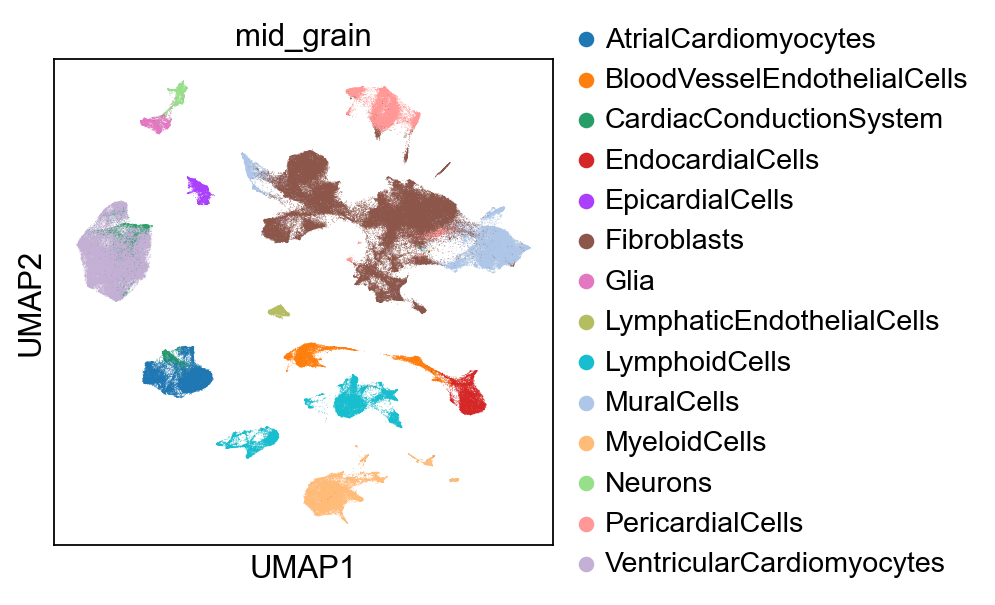

AnnData object with n_obs × n_vars = 297473 × 3392
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 

In [6]:
sc.pl.umap(adata, color=['mid_grain'])
adata

In [7]:
adata.write('./Objects/Feb28ObjectProcessed.h5ad')
#adata

In [12]:
adata.write('./Objects/Feb28ObjectRaw.h5ad')
#adata

AnnData object with n_obs × n_vars = 297473 × 3392
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 

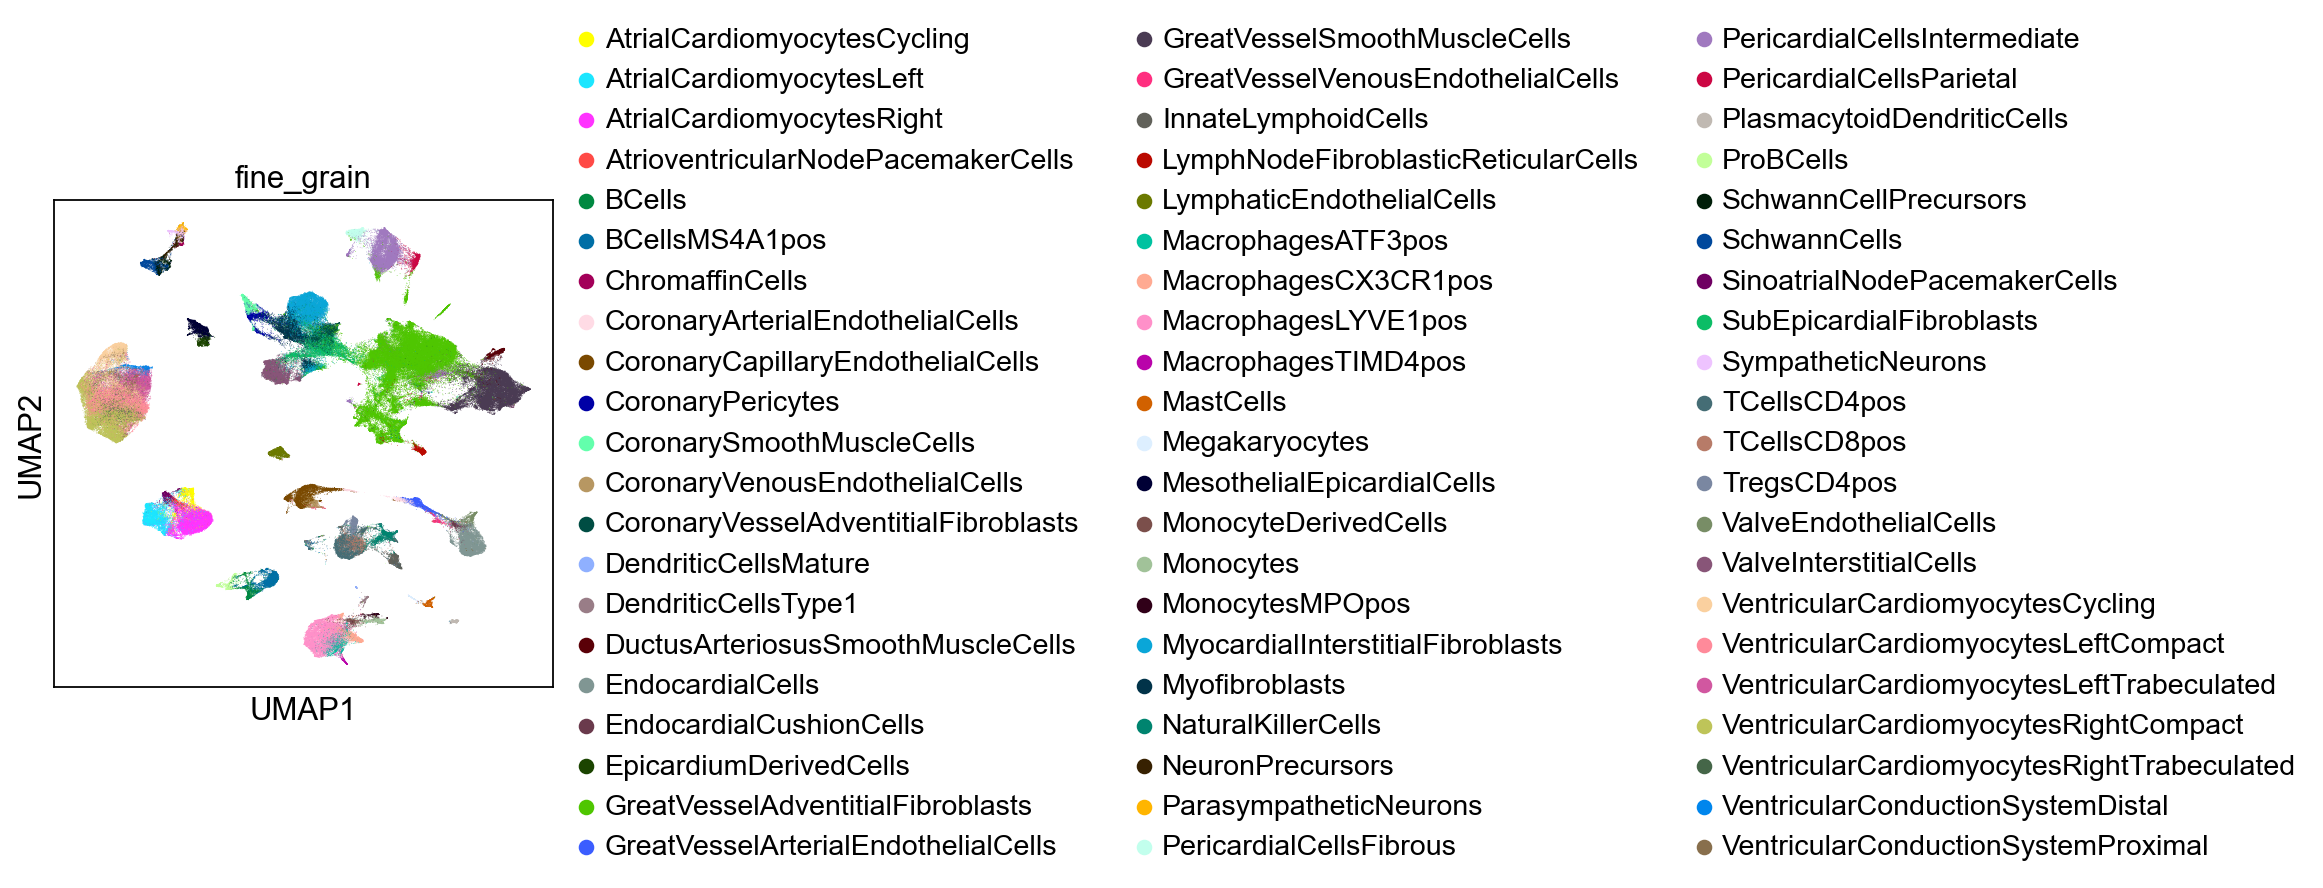

In [6]:
sc.pl.umap(adata, color=['fine_grain'])

In [7]:
adata

AnnData object with n_obs × n_vars = 297473 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'FACSgate_colors', '_scvi_manager_uuid', '_scvi_uuid', 'age_colors', 'cell_or_nucl